In [1]:
# Mini Project for project

In [2]:
# Importing netCDF4 and other libraries
import netCDF4
from netCDF4 import Dataset
import numpy as np
# Reading the netCDF files
data = Dataset(r'D:\MTP\CANESM5_Past_history\sfcWind_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc','r')
print(data)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CCCma_model_hash: 3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid: rc3-pictrl
    CCCma_pycmor_hash: 33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid: rc3.1-his01
    Conventions: CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child: 1850:01:01:00
    YMDH_branch_time_in_parent: 5201:01:01:00
    activity_id: CMIP
    branch_method: Spin-up documentation
    branch_time_in_child: 0.0
    branch_time_in_parent: 1223115.0
    contact: ec.cccma.info-info.ccmac.ec@canada.ca
    creation_date: 2019-05-02T08:01:47Z
    data_specs_version: 01.00.29
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: day
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CCCma.CanESM5.historical.none.r1i1p1f1
    grid: T63L49 native atmosphere, T63 Linear Gaussian Grid; 128 x 64 longit

In [3]:
# Displaying the names of variables
print(data.variables.keys())

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'sfcWind'])


In [4]:
# Accessing variables
wind = data.variables['sfcWind']
print(wind)
TIME = data.variables['time']
print(TIME)

<class 'netCDF4._netCDF4.Variable'>
float32 sfcWind(time, lat, lon)
    standard_name: wind_speed
    long_name: Daily-Mean Near-Surface Wind Speed
    comment: near-surface (usually, 10 meters) wind speed.
    units: m s-1
    original_name: SWA
    cell_methods: area: time: mean
    cell_measures: area: areacella
    history: 2019-05-02T08:01:47Z altered by CMOR: Treated scalar dimension: 'height'. 2019-05-02T08:01:47Z altered by CMOR: Reordered dimensions, original order: lat lon time. 2019-05-02T08:01:47Z altered by CMOR: replaced missing value flag (1e+38) with standard missing value (1e+20).
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
unlimited dimensions: time
current shape = (60225, 64, 128)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01 0:0:0.0
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (60225,)
filli

In [5]:
Latt = data.variables['lat']
print(Latt)
Lon = data.variables['lon']
print(Lon)

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
    units: degrees_east
    axis: X
    long_name: Longitude
    standard_name: longitude
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [6]:
# Dimensions
wind.dimensions

('time', 'lat', 'lon')

In [7]:
londbnds = data.variables['lon_bnds']
londbnds.dimensions

('lon', 'bnds')

In [8]:
# Data Access
time_data = data.variables['time'][:]
print(time_data)

[5.00000e-01 1.50000e+00 2.50000e+00 ... 6.02225e+04 6.02235e+04
 6.02245e+04]


In [9]:
lon_data = data.variables['lon'][:]
print(lon_data)

[  0.       2.8125   5.625    8.4375  11.25    14.0625  16.875   19.6875
  22.5     25.3125  28.125   30.9375  33.75    36.5625  39.375   42.1875
  45.      47.8125  50.625   53.4375  56.25    59.0625  61.875   64.6875
  67.5     70.3125  73.125   75.9375  78.75    81.5625  84.375   87.1875
  90.      92.8125  95.625   98.4375 101.25   104.0625 106.875  109.6875
 112.5    115.3125 118.125  120.9375 123.75   126.5625 129.375  132.1875
 135.     137.8125 140.625  143.4375 146.25   149.0625 151.875  154.6875
 157.5    160.3125 163.125  165.9375 168.75   171.5625 174.375  177.1875
 180.     182.8125 185.625  188.4375 191.25   194.0625 196.875  199.6875
 202.5    205.3125 208.125  210.9375 213.75   216.5625 219.375  222.1875
 225.     227.8125 230.625  233.4375 236.25   239.0625 241.875  244.6875
 247.5    250.3125 253.125  255.9375 258.75   261.5625 264.375  267.1875
 270.     272.8125 275.625  278.4375 281.25   284.0625 286.875  289.6875
 292.5    295.3125 298.125  300.9375 303.75   306.5

In [10]:
latt_data = data.variables['lat'][:]
print(latt_data)

[-87.86379884 -85.09652699 -82.31291295 -79.52560657 -76.73689968
 -73.94751515 -71.15775201 -68.36775611 -65.57760701 -62.7873518
 -59.99702011 -57.20663153 -54.41619953 -51.62573367 -48.83524097
 -46.04472663 -43.25419467 -40.46364818 -37.67308963 -34.88252099
 -32.09194388 -29.30135962 -26.51076933 -23.72017393 -20.92957425
 -18.13897099 -15.34836476 -12.55775612  -9.76714556  -6.97653355
  -4.18592053  -1.39530691   1.39530691   4.18592053   6.97653355
   9.76714556  12.55775612  15.34836476  18.13897099  20.92957425
  23.72017393  26.51076933  29.30135962  32.09194388  34.88252099
  37.67308963  40.46364818  43.25419467  46.04472663  48.83524097
  51.62573367  54.41619953  57.20663153  59.99702011  62.7873518
  65.57760701  68.36775611  71.15775201  73.94751515  76.73689968
  79.52560657  82.31291295  85.09652699  87.86379884]


In [11]:
height_ = data.variables['height'][:]
print(height_)

10.0


In [12]:
wind_speed_data = data.variables['sfcWind'][:]
print(wind_speed_data)

[[[ 2.6130745  2.4696093  2.1273222 ...  3.2909398  3.005378   2.8751128]
  [ 4.113402   3.7909114  3.356351  ...  4.707411   4.614628   4.4204564]
  [ 3.4577458  3.3099189  3.1596527 ...  3.476647   3.5695171  3.5752873]
  ...
  [15.806473  14.561273  12.945953  ... 16.734444  16.89502   16.599821 ]
  [12.446957  12.064834  11.509442  ... 12.586384  12.689547  12.640312 ]
  [ 9.372861   9.326451   9.272333  ...  9.370743   9.389843   9.371134 ]]

 [[ 2.7914202  2.5863495  2.372511  ...  3.3980162  3.1987154  3.0266685]
  [ 3.3278055  2.6685362  2.0031781 ...  4.8989077  4.4581985  3.938171 ]
  [ 4.2130127  3.583574   3.2278016 ...  5.884674   5.4929266  4.960909 ]
  ...
  [13.458099  12.695028  11.816965  ... 14.374823  14.346197  14.037307 ]
  [ 8.725941   7.9685955  7.1551676 ... 10.351868   9.932608   9.387485 ]
  [ 7.059473   6.8871307  6.733101  ...  7.62731    7.4123707  7.2452526]]

 [[ 4.093347   3.7737117  3.486084  ...  4.5487413  4.350606   4.2881985]
  [ 3.7469401  3.12414

In [13]:
# Plotting on map
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



In [14]:
# Specifying inputs for map
mp = Basemap(projection = 'merc', llcrnrlon = 65.805382, llcrnrlat = 2.788321, urcrnrlon = 92.949680, urcrnrlat = 43.072779, resolution = 'i')

<ipython-input-15-58bdd739395e>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x,y,np.squeeze(wind_speed_data[1,:,:]), cmap ='jet')


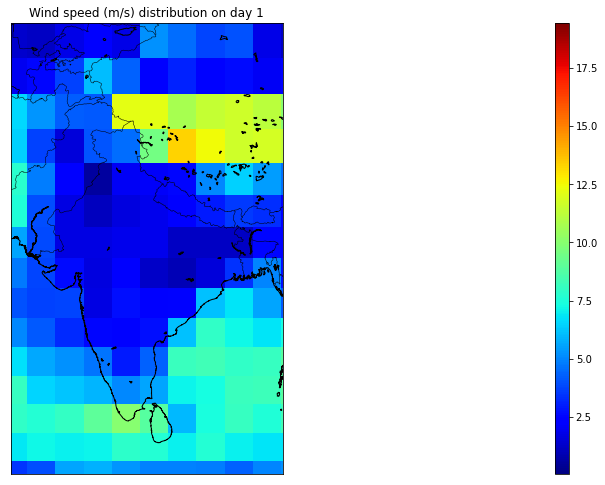

In [15]:
# Mesh creation and figure specification
longi, latti = np.meshgrid(lon_data, latt_data)
x,y = mp(longi, latti)
plt.figure(figsize = (10,10))
c_scheme = mp.pcolor(x,y,np.squeeze(wind_speed_data[1,:,:]), cmap ='jet')
mp.drawcoastlines()
mp.drawcountries()
mp.drawstates()
c_bar = mp.colorbar(c_scheme, location = 'right', pad = '100%' )

plt.title('Wind speed (m/s) distribution on day 1')
plt.show()


In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression


mp = Basemap(projection = 'merc',
llcrnrlon =  65.805382,
llcrnrlat = 2.788321,
urcrnrlon = 92.949680,
urcrnrlat =  43.072779,
resolution = 'i')

In [17]:
sea_longi1 = data.variables['lon'][18:33] # x as longitudes
print(sea_longi1)



[50.625  53.4375 56.25   59.0625 61.875  64.6875 67.5    70.3125 73.125
 75.9375 78.75   81.5625 84.375  87.1875 90.    ]


In [18]:
sea_latti = latt_data = data.variables['lat'][36] # Considered lattitude
print(sea_latti)

12.55775611523069


In [19]:
 sea_wind_speed =  data.variables['sfcWind'][1,sea_latti, 18:33] # y as wind speed 
print(sea_wind_speed)

[ 4.398381   4.239889   3.8688037  3.6740687  4.0573397  4.4743376
  4.689563   5.3800497  6.6002026  7.7108116  8.397155   9.833552
 11.232594  12.066737  12.244225 ]


In [20]:
sea_longi1 = sea_longi1.reshape((-1,1))  # Converting the matrix into suitable order

sea_longi1.shape

(15, 1)

In [21]:
# Using LinearRegression for fit
model = LinearRegression() 
model.fit(sea_longi1, sea_wind_speed)

LinearRegression()

In [22]:
# R-square value
r_sq_value = model.score(sea_longi1, sea_wind_speed)
print('R square coeff:', r_sq_value)

R square coeff: 0.8726155859112973


In [23]:
print('intercept:', model.intercept_)

intercept: -9.636965964805515


In [24]:
print('slope:', model.coef_)

slope: [0.2345929]


In [25]:
sea_windspeed_predict = model.predict(sea_longi1)
print('Actual values:', sea_wind_speed)
print('Predicted response:', sea_windspeed_predict)

Actual values: [ 4.398381   4.239889   3.8688037  3.6740687  4.0573397  4.4743376
  4.689563   5.3800497  6.6002026  7.7108116  8.397155   9.833552
 11.232594  12.066737  12.244225 ]
Predicted response: [ 2.23929957  2.8990921   3.55888463  4.21867716  4.87846969  5.53826222
  6.19805475  6.85784728  7.51763981  8.17743234  8.83722487  9.4970174
 10.15680993 10.81660246 11.47639499]


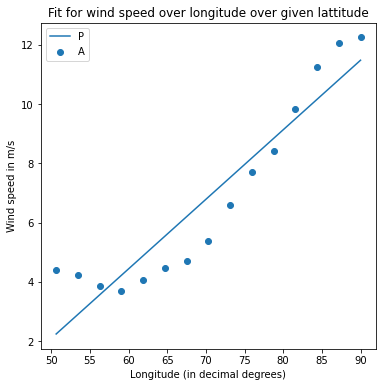

In [26]:
# Regression figure
plt.figure(figsize = (6,6))
plt.plot(sea_longi1, sea_windspeed_predict)
plt.scatter(sea_longi1, sea_wind_speed)
plt.xlabel('Longitude (in decimal degrees)')
plt.ylabel('Wind speed in m/s')
plt.legend('PA') # P for predicted and A for actual
plt.title('Fit for wind speed over longitude over given lattitude')
plt.show()